# Energy of the ensemble

In [9]:
using HDF5
using PyPlot

In [ ]:
## This notebook is intended for the analyisis of the energy of an ensemble of different initial conditions.
## The results are supposed to be saved in a file with .hdf5 extension in the folder  ContactFlowsTaylor/RungeKutta/HDF5/

In [10]:
filename = "ensemblensampling=10to6.hdf5" #The file must exist in the HDF5 folder
file = h5open("../HDF5/$filename", "r")

HDF5 data file: ../HDF5/ciensimulacionesnsampling=10ala6.hdf5

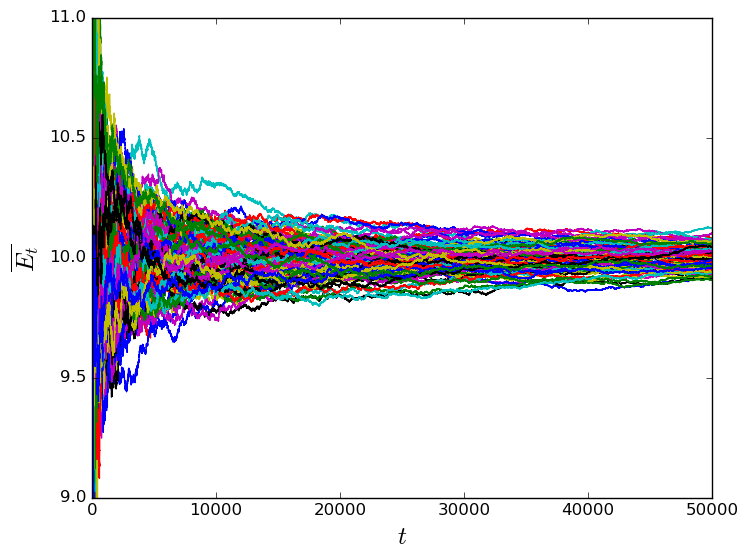

In [19]:
plt[:ylabel](L"$\overline{E_t}$",fontsize="18")
plt[:xlabel](L"$t$", fontsize = "18")
plt[:ylim](9,11)
n = 100
Efinal = Vector{Float64}(n)
for i in 1:n
    sim = read(file, "simulation-$i")
    t = sim["t"]
    q = sim["q"]
    p = sim["p"]
    S = sim["S"]
    E = (p.^2/2 + 2*q.^2)  #Energy;
    E = E[1:10:end]
    Eavg = [Float64(sum(E[1:j])/j) for j in 1:(length(E))]
    Efinal[i] = Eavg[end] 
    time = t[1:10:end]
    plot(time, Eavg)
end
plt[:savefig]("ensemble.png")
    



In [12]:
Efinal

100-element Array{Float64,1}:
 10.0336 
 10.01   
 10.0611 
 10.1213 
 10.0275 
 10.0475 
 10.0029 
  9.9884 
  9.97073
 10.0163 
  9.96703
  9.96044
  9.98998
  ⋮      
 10.0238 
  9.99648
  9.9938 
  9.98939
  9.92053
 10.0096 
  9.93669
 10.0285 
  9.93992
 10.0448 
  9.95696
  9.96593

In [18]:
in(true,Efinal .< 9.8)

false

In [ ]:
close(file)